<a href="https://colab.research.google.com/github/licciard/fun-stuff/blob/main/math/lambdas3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modules

In [ ]:
import sympy
import mpmath
import numpy as np
mpmath.mp.dps = 15
print(mpmath.mp)
#sympy.init_session()
sympy.init_printing(use_latex=False)
import scipy.special as scp
import scipy.optimize as opt

import matplotlib.pyplot as plt
%matplotlib inline

Mpmath settings:
  mp.prec = 53                [default: 53]
  mp.dps = 15                 [default: 15]
  mp.trap_complex = False     [default: False]


Integral complex number

In [ ]:
def mylin(x):
  return x

n = 2

def lambda1_integrand(t):
  theta = mpmath.exp(t*mpmath.j)
  return -mpmath.log(theta*mpmath.zeta(1+theta))*mpmath.power(theta,-2)#/(2*mpmath.pi*mpmath.j)

def lambda2_integrand(t):
  theta = mpmath.exp(t*mpmath.j)
  return -2*mpmath.log(theta*mpmath.zeta(1+theta))*mpmath.power(theta,-3)*(1+theta)#/(2*mpmath.pi*mpmath.j)

def lambda3_integrand(t):
  theta = mpmath.exp(t*mpmath.j)
  return -3*mpmath.log(theta*mpmath.zeta(1+theta))*mpmath.power(theta,-4)*mpmath.power(1+theta,2)

def lambda4_integrand(t):
  theta = mpmath.exp(t*mpmath.j)
  return -4*mpmath.log(theta*mpmath.zeta(1+theta))*mpmath.power(theta,-5)*mpmath.power(1+theta,3)

def lambda5_integrand(t):
  theta = mpmath.exp(t*mpmath.j)
  return -5*mpmath.log(theta*mpmath.zeta(1+theta))*mpmath.power(theta,-6)*mpmath.power(1+theta,4)

def lambda6_integrand(t):
  theta = mpmath.exp(t*mpmath.j)
  return -6*mpmath.log(theta*mpmath.zeta(1+theta))*mpmath.power(theta,-7)*mpmath.power(1+theta,5)

def lambda7_integrand(t):
  theta = mpmath.exp(t*mpmath.j)
  return -7*mpmath.log(theta*mpmath.zeta(1+theta))*mpmath.power(theta,-8)*mpmath.power(1+theta,6)

def lambda_integrand(t):
  theta = mpmath.exp(t*mpmath.j)
  return mpmath.log(theta*mpmath.zeta(1+theta))*mpmath.power(theta,-n)*mpmath.power(1+theta,n-1)

#mpmath.quad(mylin,[0,mpmath.j])
#lambda1_integrand(1)
for n in range(1,50):
  print("{} --> {}".format(n,n*mpmath.quad(lambda_integrand,[0,mpmath.pi])/(mpmath.pi)))

1 --> (0.577215664901533 - 0.0605130163441739j)
2 --> (0.966885096962701 - 0.833620186083389j)
3 --> (1.2206969282167 - 2.14743286757246j)
4 --> (1.37558813187126 - 4.3615283810059j)
5 --> (1.45826850019717 - 8.25650393681165j)
6 --> (1.48829832721222 - 15.3896196382937j)
7 --> (1.48019084023884 - 28.8264899674144j)
8 --> (1.44485574411943 - 54.5981445042457j)
9 --> (1.3905964067913 - 104.590598006883j)
10 --> (1.32380368369629 - 202.275641506803j)
11 --> (1.24944277582208 - 394.085136674032j)
12 --> (1.17139824693906 - 772.004471537845j)
13 --> (1.09272131711462 - 1518.48372224896j)
14 --> (1.01580941259033 - 2995.76782936648j)
15 --> (0.942538421086352 - 5923.67426621112j)
16 --> (0.874361661380814 - 11733.5575171478j)
17 --> (0.812385212605197 - 23273.3576028421j)
18 --> (0.757426282975166 - 46212.4593617463j)
19 --> (0.710059274375477 - 91841.8486797339j)
20 --> (0.670652812798627 - 182656.902878093j)
21 --> (0.639400059775679 - 363490.753607108j)
22 --> (0.616343958428758 - 723721

Integration by parts

In [ ]:
mpmath.mp.dps = 15

def log_zeta_real(t):
  theta = mpmath.exp(t*mpmath.j)
  zetat = mpmath.zeta(1+theta)
  rz = mpmath.fabs(zetat)
  #value = (mpmath.log(rz)*mpmath.cos((n+1)*t/2))*mpmath.power(2*mpmath.cos(t/2),n-1)
  value = mpmath.log(rz)
  return value

def log_zeta_imag(t):
  theta = mpmath.exp(t*mpmath.j)
  zetat = mpmath.zeta(1+theta)
  az = mpmath.arg(zetat)
  at = mpmath.arg(theta)
  #value = ((at + az) * mpmath.sin((n+1)*t/2))*mpmath.power(2*mpmath.cos(t/2),n-1)
  value = (at + az) 
  return value

def log_zeta(t):
  theta = mpmath.exp(t*mpmath.j)
  zetat = mpmath.zeta(1+theta)
  return mpmath.log(theta*zetat)

Nt = 2000
dt = np.arange(-mpmath.pi,mpmath.pi,2*mpmath.pi/Nt)

zeta_real = [log_zeta_real(t) for t in dt]
zeta_imag = [log_zeta_imag(t) for t in dt]
zeta_both_real = [mpmath.re(log_zeta(t)) for t in dt]
zeta_both_imag = [mpmath.im(log_zeta(t)) for t in dt]


In [ ]:
dzeta_both = [mpmath.diff(log_zeta,t) for t in dt]
dzeta_both_real = [mpmath.re(z) for z in dzeta_both]
dzeta_both_imag = [mpmath.im(z) for z in dzeta_both]

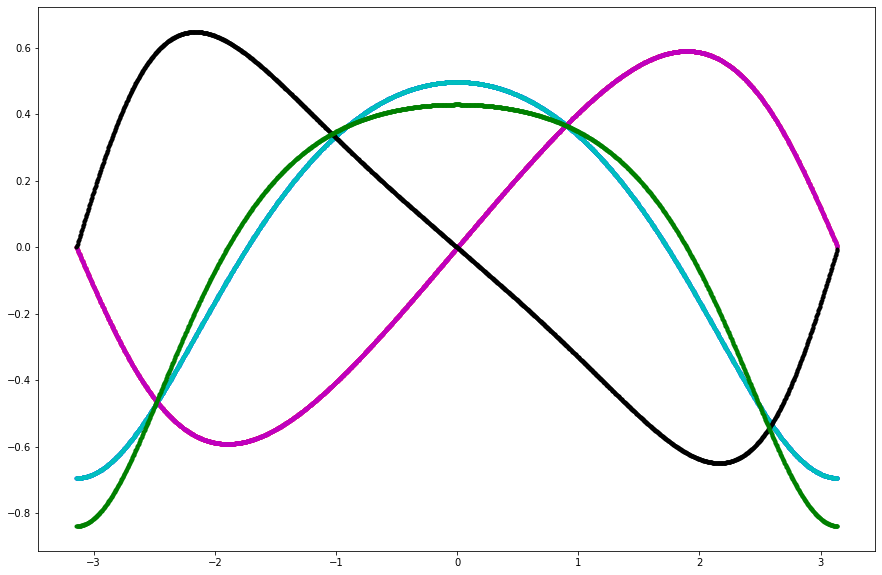

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(dt, zeta_real, 'b.')
plt.plot(dt, zeta_imag, 'r.')
plt.plot(dt, zeta_both_real, 'c.')
plt.plot(dt, zeta_both_imag, 'm.')

plt.plot(dt, dzeta_both_real, 'k.')
plt.plot(dt, dzeta_both_imag, 'g.')

#plt.plot(dn,mypow(dn,*popt),'r-')
#plt.xscale('log')
#plt.yscale('log')
axes = plt.gca()
#axes.set_xlim([2020,2060])
#axes.set_ylim([-10,10])

plt.show()

In [ ]:
def part_integrand_12(t):
  return mpmath.re(mpmath.diff(log_zeta,t))*mpmath.power(2*mpmath.cos(t/2),n)*mpmath.sin(n*t/2)

def part_integrand_3(t):
  return mpmath.im(log_zeta(t))*mpmath.power(2*mpmath.cos(t/2),n)*mpmath.sin(n*t/2)

def part_integrand_4(t):
  return mpmath.im(mpmath.diff(log_zeta,t))*mpmath.power(2*mpmath.cos(t/2),n)*mpmath.cos(n*t/2)

mpmath.mp.dps = 15
for n in range(1,15):
  #print("{} --> {}".format(n,n*mpmath.quad(lambda_integrand_rlarge,[0,2*mpmath.pi])/(2*mpmath.pi)))
  coef124 = -2/(2*mpmath.pi*n)
  coef3 = 2/(2*mpmath.pi)
  i12 = coef124 * mpmath.quad(part_integrand_12,[0,mpmath.pi])
  i3 = coef3 * mpmath.quad(part_integrand_3,[0,mpmath.pi])
  i4 = coef124 * mpmath.quad(part_integrand_4,[0,mpmath.pi])
  tot = i12+i3+i4
  print("{}: {} + {} + {} = {}".format(n,i12,i3,i4,n*(i12-i4)))


1: 0.288607832450766 + 0.288607832450766 + -0.288607832450766 = 0.577215664901533
2: 0.241721274240675 + 0.530329106691442 + -0.241721274240675 = 0.966885096962701
3: 0.203449488036116 + 0.733778594727557 + -0.203449488036116 = 1.2206969282167
4: 0.171948516483907 + 0.905727111211465 + -0.171948516483907 = 1.37558813187126
5: 0.145826850019717 + 1.05155396123118 + -0.145826850019717 = 1.45826850019717
6: 0.124024860601018 + 1.1755788218322 + -0.124024860601018 = 1.48829832721222
7: 0.105727917159917 + 1.28130673899212 + -0.105727917159917 = 1.48019084023884
8: 0.0903034840074645 + 1.37161022299958 + -0.0903034840074645 = 1.44485574411943
9: 0.0772553559328498 + 1.44886557893243 + -0.0772553559328498 = 1.3905964067913
10: 0.0661901841848147 + 1.51505576311725 + -0.0661901841848147 = 1.32380368369629
11: 0.0567928534464583 + 1.5718486165637 + -0.0567928534464583 = 1.24944277582208
12: 0.0488082602891276 + 1.62065687685283 + -0.0488082602891276 = 1.17139824693906
13: 0.0420277429659469 + 

In [ ]:
def lambda_integrand_parts(t):
  return mpmath.diff(log_zeta,t)*mpmath.power(2*mpmath.cos(t/2),n)*mpmath.power(mpmath.exp(-t*mpmath.j/2),n)

mpmath.mp.dps = 15
for n in range(1,15):
  coef = -mpmath.j/(2*mpmath.pi*n)
  iparts = coef * mpmath.quad(lambda_integrand_parts,[-mpmath.pi,mpmath.pi])
  print("{}: {}".format(n,n*iparts))


1: (0.577215664901533 + 1.64648764033084e-24j)
2: (0.966885096962701 - 7.6799004432776e-24j)
3: (1.2206969282167 - 9.09715677609306e-24j)
4: (1.37558813187126 + 9.25176958605909e-24j)
5: (1.45826850019717 + 2.82945235760506e-22j)
6: (1.48829832721222 - 1.21039713004468e-23j)
7: (1.48019084023884 - 1.85818521601795e-22j)
8: (1.44485574411943 - 2.06002736101369e-21j)
9: (1.3905964067913 - 5.47967030433057e-21j)
10: (1.32380368369629 - 1.19910612008097e-21j)
11: (1.24944277582208 - 3.44297187439018e-21j)
12: (1.17139824693906 - 1.31774961401763e-21j)
13: (1.09272131711462 - 6.07004374241083e-21j)
14: (1.01580941259034 - 1.65973070115714e-20j)


In [ ]:
# my own derivative of the logarithmic function

def deriv_log_zeta(x):
  theta = mpmath.exp(x*mpmath.j)
  term = mpmath.zeta(1+theta,derivative=1)/mpmath.zeta(1+theta)
  const = 1  
  return mpmath.j*(const + term*theta)

my_dzeta_both = [deriv_log_zeta(t) for t in dt]
my_dzeta_both_real = [mpmath.re(z) for z in my_dzeta_both]
my_dzeta_both_imag = [mpmath.im(z) for z in my_dzeta_both]

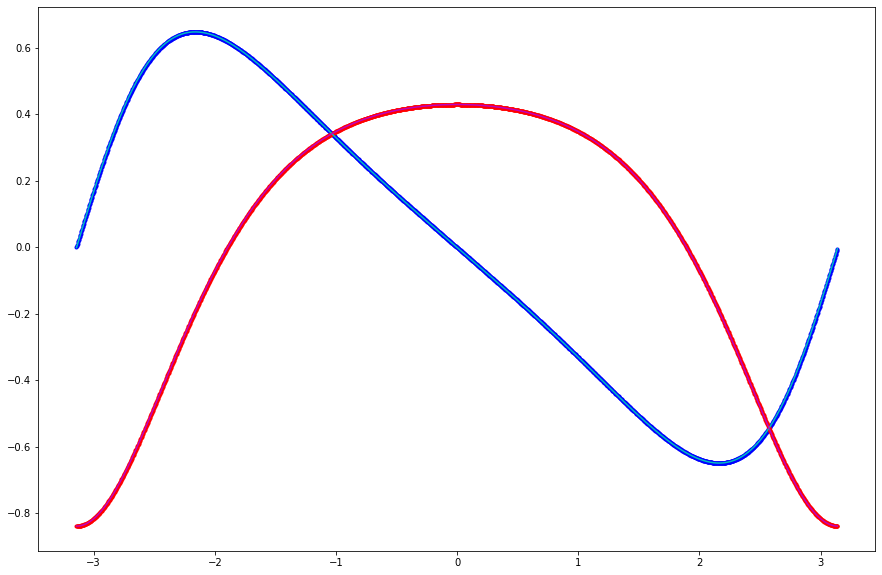

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(dt, dzeta_both_real, 'b.')
plt.plot(dt, dzeta_both_imag, 'r.')
plt.plot(dt, my_dzeta_both_real, 'c-')
plt.plot(dt, my_dzeta_both_imag, 'm-')

#plt.plot(dn,mypow(dn,*popt),'r-')
#plt.xscale('log')
#plt.yscale('log')
axes = plt.gca()
#axes.set_xlim([2020,2060])
#axes.set_ylim([-10,10])

plt.show()

In [ ]:
def my_deriv_log_zeta(x):
  theta = mpmath.exp(x*mpmath.j)
  term = mpmath.zeta(1+theta,derivative=1)/mpmath.zeta(1+theta) 
  return term*theta

def my_deriv_log_zeta_split(x):
  theta = mpmath.exp(x*mpmath.j)
  term = mpmath.zeta(1+theta,derivative=1)/mpmath.zeta(1+theta) 
  return term

print("test: {} vs {}".format(my_deriv_log_zeta_split(-mpmath.pi),mpmath.zeta(0,derivative=1)/mpmath.zeta(0) ))

def my_lambda_integrand_parts(t):
  return my_deriv_log_zeta_split(t)*mpmath.exp(t*mpmath.j)*mpmath.power(2*mpmath.cos(t/2),n)*mpmath.power(mpmath.exp(t*mpmath.j/2),-n)

mpmath.mp.dps = 15
for n in range(1,15):
  coef = 1/(2*mpmath.pi*n)
  iparts = 1/n + coef * mpmath.quad(my_lambda_integrand_parts,[-mpmath.pi,mpmath.pi])
  print("{}: {}".format(n,n*iparts))


test: (1.83787706640935 - 7.7744013812251e-17j) vs 1.83787706640935
1: (0.577215664901533 + 1.27302974385121e-23j)
2: (0.966885096962701 + 1.97773851350109e-23j)
3: (1.2206969282167 + 5.63651376653123e-24j)
4: (1.37558813187126 - 4.10178125531395e-23j)
5: (1.45826850019717 - 2.14295712684215e-22j)
6: (1.48829832721222 - 5.16129572894169e-22j)
7: (1.48019084023884 - 1.12342313568413e-21j)
8: (1.44485574411943 - 8.59080879220318e-22j)
9: (1.3905964067913 - 3.20660195280269e-21j)
10: (1.32380368369629 - 8.45510799181623e-21j)
11: (1.24944277582208 - 4.37769522764307e-21j)
12: (1.17139824693906 - 1.08187999529865e-20j)
13: (1.09272131711462 - 5.82027020014381e-21j)
14: (1.01580941259034 + 3.49447971350393e-20j)


In [ ]:
my_dzeta_split = [mpmath.re(my_deriv_log_zeta_split(t)) for t in dt]


In [ ]:
mpmath.mp.dps = 1000

from google.colab import drive
drive.mount('/content/gdrive')
DATA_PATH = "/content/gdrive/My Drive/Colab Notebooks/math/gammas"
import pickle
pickle_in = open(DATA_PATH+'/taylor_digits1000_n1000.pkl', 'rb')
taylor_coefs = pickle.load(pickle_in)
my_taylor_coef = [mpmath.re(my_deriv_log_zeta_split(mpmath.pi))] + taylor_coefs

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
mpmath.mp.dps = 25

def log_deriv_zeta(x):
  return mpmath.zeta(x,derivative=1)/mpmath.zeta(x)

for p in range(0,3):
  #zetap = mpmath.zeta(p+1)**(1,-1)[p%2]
  lgdzp = mpmath.diff(log_deriv_zeta,0,n=p)/mpmath.gamma(p+1)
  print("(Z'/Z)({})(0) = {}".format(p,lgdzp))
  #relgdzp = log_deriv_zeta_zero(p)#/mpmath.gamma(n+1)
  #print("(Z'/Z)({})(0) = {} vs {} | % Z({}) --> {}".format(p,lgdzp,relgdzp,p,lgdzp/zetap))

(Z'/Z)(0)(0) = 1.837877066409345483560659
(Z'/Z)(1)(0) = 0.6349208005837479936390042
(Z'/Z)(2)(0) = 1.15036827112640139159773


In [ ]:
mpmath.mp.dps = 25

my_taylor_coef = []
for p in range(5):
  coef = mpmath.diff(log_deriv_zeta,0,n=p)/mpmath.gamma(p+1)
  print("{} --> {}".format(p,coef))
  my_taylor_coef.append(coef)
# slow convergence

0 --> 1.837877066409345483560659
1 --> 0.6349208005837479936390042
2 --> 1.15036827112640139159773
3 --> 0.932281170671792173511923
4 --> 1.032403277254874547590119


In [ ]:
mpmath.mp.dps = 200

my_taylor_coef = [mpmath.re(my_deriv_log_zeta_split(mpmath.pi))] + taylor_coefs
def my_taylor_expansion_split(x):
  x = 1 + mpmath.exp(x*mpmath.j)
  tot = 0
  for p in range(50):
    tot += my_taylor_coef[p]*mpmath.power(x,p)
  return mpmath.re(tot)
                                                                                        
my_taylor_expansion = [my_taylor_expansion_split(t) for t in dt]

In [ ]:
# using reflective of log deriv
mpmath.mp.dps = 15

def deriv_log_zeta_reflect(x):
  theta = mpmath.exp(x*mpmath.j)
  dig = mpmath.digamma(-theta)
  logderiv = mpmath.zeta(-theta,derivative=1)/mpmath.zeta(-theta)
  tantheta = mpmath.tan(theta*mpmath.pi/2)*mpmath.pi/2
  return -dig-logderiv-tantheta+mpmath.log(2*mpmath.pi)

def deriv_log_zeta_reflect_new(x):
  theta = mpmath.exp(x*mpmath.j)
  dig = mpmath.digamma(-theta/2)
  digi = mpmath.digamma((1+theta)/2)
  logderiv = mpmath.zeta(-theta,derivative=1)/mpmath.zeta(-theta)
  return -logderiv-(dig+digi)/2+mpmath.log(mpmath.pi)

reflect_new_dzeta = [mpmath.re(deriv_log_zeta_reflect_new(t)) for t in dt]
reflect_dzeta = [mpmath.re(deriv_log_zeta_reflect(t)) for t in dt]


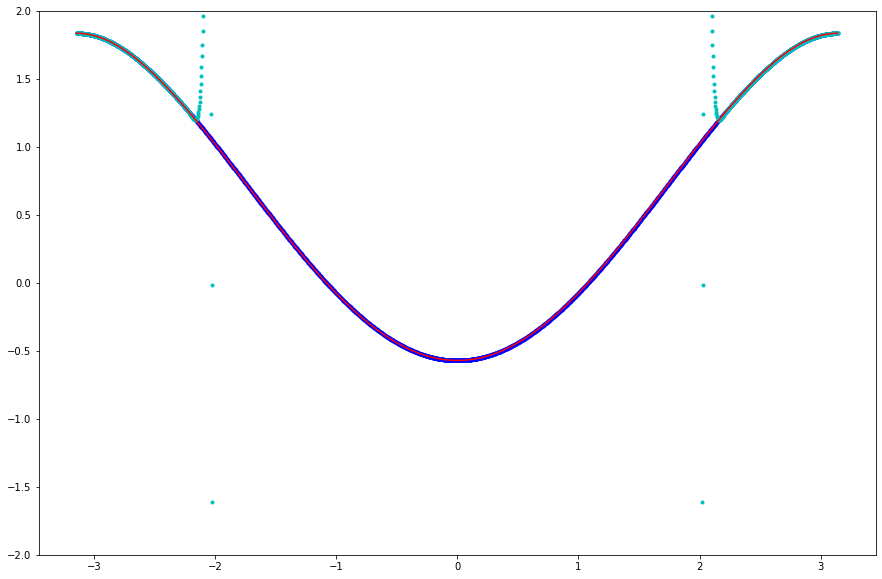

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(dt, my_dzeta_split, 'b.')
plt.plot(dt, my_taylor_expansion, 'c.')
#plt.plot(dt, reflect_dzeta, 'k-')
plt.plot(dt, reflect_new_dzeta, 'r-')

#plt.plot(dn,mypow(dn,*popt),'r-')
#plt.xscale('log')
#plt.yscale('log')
axes = plt.gca()
#axes.set_xlim([2020,2060])
axes.set_ylim([-2,2])

plt.show()

In [ ]:
def reflect_lambda_integrand(t):
  return deriv_log_zeta_reflect(t)*mpmath.exp(t*mpmath.j)*mpmath.power(2*mpmath.cos(t/2),n)*mpmath.power(mpmath.exp(t*mpmath.j/2),-n)

def reflect_new_lambda_integrand(t):
  return deriv_log_zeta_reflect_new(t)*mpmath.exp(t*mpmath.j)*mpmath.power(2*mpmath.cos(t/2),n)*mpmath.power(mpmath.exp(t*mpmath.j/2),-n)

mpmath.mp.dps = 15
for n in range(1,15):
  coef = 1/(mpmath.pi*n)
  iparts = 1/n + coef * mpmath.quad(reflect_new_lambda_integrand,[0,mpmath.pi])
  print("{}: {}".format(n,n*iparts))

1: (0.577215664901533 + 0.89295260928961j)
2: (0.966885096962701 + 1.07331106518418j)
3: (1.2206969282167 + 1.24201645338429j)
4: (1.37558813187126 + 1.56854389775082j)
5: (1.45826850019717 + 2.24551843965095j)
6: (1.48829832721222 + 3.57724184305522j)
7: (1.48019084023884 + 6.09996245152804j)
8: (1.44485574411943 + 10.7923588816149j)
9: (1.3905964067913 + 19.4644703443965j)
10: (1.32380368369629 + 35.4868976258438j)
11: (1.24944277582208 + 65.1659926858567j)
12: (1.17139824693906 + 120.346586050702j)
13: (1.09272131711462 + 223.351841876273j)
14: (1.01580941259034 + 416.381862253921j)


In [ ]:
def deriv_log_zeta_reflect_terms(x):
  theta = mpmath.exp(x*mpmath.j)
  #dig = mpmath.digamma(-theta)
  logderiv = mpmath.zeta(-theta,derivative=1)/mpmath.zeta(-theta)
  #tantheta = mpmath.tan(theta*mpmath.pi/2)*mpmath.pi/2
  return -logderiv #-dig-tantheta #mpmath.log(2*mpmath.pi) #

def reflect_lambda_integrand_terms(t):
  return deriv_log_zeta_reflect_terms(t)*mpmath.exp(t*mpmath.j)*mpmath.power(2*mpmath.cos(t/2),n)*mpmath.power(mpmath.exp(t*mpmath.j/2),-n)

def deriv_log_zeta_reflect_new_terms(x):
  theta = mpmath.exp(x*mpmath.j)
  #dig = mpmath.digamma(-theta/2)
  #digi = mpmath.digamma((1+theta)/2)
  logderiv = mpmath.zeta(-theta,derivative=1)/mpmath.zeta(-theta)
  return -logderiv #-digi/2 + mpmath.log(mpmath.pi)#-(dig/2+logderiv)#+ mpmath.log(mpmath.pi) # -digi/2 + mpmath.log(mpmath.pi)#+

def reflect_new_lambda_integrand_terms(t):
  return deriv_log_zeta_reflect_new_terms(t)*mpmath.exp(t*mpmath.j)*mpmath.power(2*mpmath.cos(t/2),n)*mpmath.power(mpmath.exp(t*mpmath.j/2),-n)

mpmath.mp.dps = 25
for n in range(1,50):
  coef = 1/(2*mpmath.pi)
  iparts = coef * mpmath.quad(reflect_new_lambda_integrand_terms,[-mpmath.pi,mpmath.pi])
  print("{}: {}".format(n,iparts))

1: (-1.837877066409345483560659 + 5.133316683337344454567583e-34j)
2: (-3.040833332234942973482315 - 7.785791443045443353569195e-34j)
3: (-4.759237068603193861362696 - 4.147813079080474336241123e-33j)
4: (-7.211175375968707365287609 + 5.663022004748137225741757e-33j)
5: (-10.71485746136917507742106 + 1.592834254659789450830938e-32j)
6: (-15.73691361958733559063714 + 4.202285978795373069116598e-32j)
7: (-22.96446765152376662598318 + 6.403244004193040810685723e-32j)
8: (-33.41278263152575841379001 - 1.12379422768588743953361e-31j)
9: (-48.58615916147300248254627 - 2.702890073112344193601324e-31j)
10: (-70.71857905684905002623075 - 8.48145155097116755332825e-31j)
11: (-103.1338018551404276217356 - 1.716622784543046436584413e-30j)
12: (-150.7844353992728713133555 - 5.043200639526829898193832e-30j)
13: (-221.0592128172411404924694 - 8.116709623910268671197702e-30j)
14: (-324.9922627018785539896048 - 1.087178504432631237110355e-29j)
15: (-479.0749759113229144063283 - 1.7950310401428804997544

In [ ]:
mpmath.mp.dps = 25

def real_integrand_offset(t):
  return mpmath.power(2*mpmath.cos(t/2),n)*mpmath.cos((n-2)*t/2)

for n in range(1,25):
  ioff = mpmath.quad(real_integrand_offset,[-mpmath.pi,mpmath.pi])/(2*mpmath.pi)
  print("Integral({}) = {}".format(n,ioff))

Integral(1) = 1.0
Integral(2) = 2.0
Integral(3) = 3.0
Integral(4) = 4.0
Integral(5) = 5.0
Integral(6) = 6.0
Integral(7) = 7.0
Integral(8) = 8.0
Integral(9) = 9.0
Integral(10) = 10.0
Integral(11) = 11.0
Integral(12) = 12.0
Integral(13) = 13.0
Integral(14) = 14.0
Integral(15) = 15.0
Integral(16) = 16.0
Integral(17) = 17.0
Integral(18) = 18.0
Integral(19) = 19.0
Integral(20) = 20.0
Integral(21) = 21.0
Integral(22) = 22.0
Integral(23) = 23.0
Integral(24) = 24.0


In [ ]:
# tests of euler-maclaurin formula

mpmath.mp.dps = 1000

def p2_func(x):
  b2 = mpmath.power(x - mpmath.floor(x),2) - (x - mpmath.floor(x)) + 1/6
  return b2/mpmath.power(x,3)

pval = mpmath.quad(p2_func,[1,10000000000])
print(pval)


0.00611840534574761814325457106465821746760898085638445315937879261824859451746578094146069283017353210834973669618027926014729736501906675938985740194799703644249223622552834928847007607448955003470660767173097405094220809061716244687278738481171702076579642157491029602929035148888151538956444561982639627606217200537307639695698988877978733905641964399271627529470570168965116856841625372184198855381180757016721485592152917985032443273004551661625325255058525981096120531548831666830317699282910098482448487080459955507661677105754778019709572000523598787959475783778403805262568756642885647453507009426013380607439973369015889214688803662856271758336655321612448440458335527101859265501260251269369919589186750146280455379850975034433400476450254819720251586950215300019686806708683722333992196992416650173735627658187219867194450040481596454832774174339176665897156418735973429795474964524121216161260985058628180442931547018416771319812680144103842555470725782133537106660502757323986317274549

In [ ]:
mpmath.mp.dps = 500

def digamma_integrand_slowgrow(t):
  digi = mpmath.digamma((1+mpmath.exp(t*mpmath.j))/2)
  return mpmath.re(digi*mpmath.exp(t*mpmath.j)*mpmath.power(2*mpmath.cos(t/2),n)*mpmath.power(mpmath.exp(t*mpmath.j/2),-n))

def digamma_integrand_fastgrow(t):
  dig = mpmath.digamma(-mpmath.exp(t*mpmath.j)/2)
  return mpmath.re(dig*mpmath.exp(t*mpmath.j)*mpmath.power(2*mpmath.cos(t/2),n)*mpmath.power(mpmath.exp(t*mpmath.j/2),-n))

def digamma_sum_binomial(n):
  tot = -2 - mpmath.euler*n
  for p in range(1,100):
    zetap = mpmath.zeta(1+p)
    sign = (-1,1)[p%2]
    tot += sign*zetap*sympy.binomial(n+p,p+1)/mpmath.power(2,p)
  return tot

def digamma_sum_generate(n):
  tot = -2 - mpmath.euler*n
  part = 0
  for k in range(1,1000*n):
    part += mpmath.power(1/(1+1/(2*k)),n)-1 + n/(2*k)
  return tot+2*part

def digamma_em_formula(n):
  #return n*(mpmath.log(n/2)-1/2)
  #return -1 + n*(mpmath.log(n/2)-1/2-mpmath.power(2/3,n+1)/12)+mpmath.power(2/3,n)/2
  # precise error < 3
  return n*(mpmath.log(n/2)+0.00612-1/2+1/12)

def digamma_fastgrow_sum_binomial(n):
  tot = +2 - mpmath.euler*n
  for p in range(1,100):
    zetap = mpmath.zeta(1+p)
    tot -= zetap*sympy.binomial(n,p+1)/mpmath.power(2,p)
  return tot

def digamma_fastgrow_generate(n):
  tot = +2 - mpmath.euler*n
  part = 0
  for k in range(1,100*n):
    part += mpmath.power(1+1/(2*k),n)-1 - n/(2*k)
  return tot-2*part

for n in range(500,700,25):
  idis = mpmath.quad(digamma_integrand_slowgrow,[-mpmath.pi,mpmath.pi])/(2*mpmath.pi)
  #idif = mpmath.quad(digamma_integrand_fastgrow,[-mpmath.pi,mpmath.pi])/(2*mpmath.pi)
  #sumdigf = digamma_fastgrow_sum_binomial(n)
  #generatef = digamma_fastgrow_generate(n)
  #ratiof = abs(generatef-idif)/abs(idif)
  #sumdig = digamma_sum_binomial(n)
  #generate = digamma_sum_generate(n)
  emformula = digamma_em_formula(n)
  ratio = abs(emformula-idis)/abs(idis)
  #print("Integral({}) = {} vs {} vs {} --> {}".format(n,idif,sumdigf,generatef,ratiof))
  #print("Integral({}) = {} vs {} vs {} --> {}".format(n,idis,sumdig,generate,ratio))
  #print("Integral({}) = {} vs {} vs {} --> {}".format(n,idis,generate,emformula,ratio))
  print("Integral({}) = {} vs {} --> {}".format(n,idis,emformula,ratio))
  #print("Approx({}) = {}".format(n,generate/(n*(mpmath.log(n)**1.1))))
  

Integral(500) = 2548.8381247152896467860275140683849998177354503120055413259405455605157103323740786482556082422180611112368461582139941205986809283603170994482683559768525578655431146918852993378301103144281723199037779443344773236275039179482376854769154468580154929547347284956837712254935904140702507101448767859364437737045431039642507820737534570657541582550130265757736616701413344692391856940492449842627268743995700701672666716535732665203226924829157394278693949858501482818222813531813394289092503474660995 vs 2555.457125597789880749600382480872838844484073327700962858999341957965292546334004748132480637978759970950195042858687216428767961866079577966760302013096572293633241659960586075392803615458124321466907848083568643704148769876651856615264674595081361685723414458540637247034829754982980271291648289417222185761398609041960225543458122321514262468736060194427926284322055760404776060514746152880264575706092256062767751679808555489041002777698914240893968499325128396160532064976

KeyboardInterrupt: ignored

In [ ]:
# status ...

mpmath.mp.dps = 15

def digamma_integrand(t):
  dig = mpmath.digamma(-mpmath.exp(t*mpmath.j)/2)
  digi = mpmath.digamma((1+mpmath.exp(t*mpmath.j))/2)
  return 0.5*mpmath.re((dig+digi)*mpmath.exp(t*mpmath.j)*mpmath.power(2*mpmath.cos(t/2),n)*mpmath.power(mpmath.exp(t*mpmath.j/2),-n))

def reflect_new_zeta_integrand(t):
  theta = mpmath.exp(t*mpmath.j)
  logderiv = mpmath.zeta(-theta,derivative=1)/mpmath.zeta(-theta)
  return -logderiv*mpmath.exp(t*mpmath.j)*mpmath.power(2*mpmath.cos(t/2),n)*mpmath.power(mpmath.exp(t*mpmath.j/2),-n)

R = 4
def reflect_new_zeta_integrand_radius(t):
  theta = mpmath.exp(t*mpmath.j)/R
  logderiv = mpmath.zeta(theta,derivative=1)/mpmath.zeta(theta)
  return logderiv*mpmath.power(1-1/theta,n)*theta

def log_deriv_zeta(x):
  return mpmath.zeta(x,derivative=1)/mpmath.zeta(x)

def log_deriv_quart_exact(k):
  return mpmath.diff(log_deriv_zeta,1/4,n=k)/mpmath.gamma(k+1)

kmax = 3
def log_deriv_quart_approx(k,nmax = 100):
  if k < kmax:
    return log_deriv_quart_exact(k)
  tot = 0
  for p in range(1,nmax):
    tot += mpmath.power(1/(1+8*p),k+1)
  sign = (1,-1)[k%2]
  tot = mpmath.power(1/3,k+1) + sign*tot
  return mpmath.power(4,k+1)*tot

def sum_zeta_integral_quart(n,nmax = 100):
  tot = 0
  for k in range(nmax+1):
    term = 0
    for p in range(k+1):
      term += sympy.binomial(k,p)*sympy.binomial(n,p+1)*mpmath.power(4,p)
      #print("k,p = {},{} --> {}".format(k,p,term))
    #tot -= log_deriv_quart_exact(k)*mpmath.power(-1/4,k)*term
    tot -= log_deriv_quart_approx(k)*mpmath.power(-1/4,k)*term
  return tot

def limsum(n,nmax=100):
  term = mpmath.euler*n
  for k in range(1,nmax+1):
    term += mpmath.power(1+1/(2*k),n) - mpmath.power(1/(1+1/(2*k)),n) - n/k - 1
  return term

def partial_lambda_sum(n):
  tot = 1 + mpmath.log(mpmath.pi)*n
  tot += limsum(n,n*n)
  #tot += mpmath.quad(reflect_new_zeta_integrand,[-mpmath.pi,mpmath.pi])/(2*mpmath.pi)
  #tot += mpmath.quad(reflect_new_zeta_integrand_radius,[-mpmath.pi,mpmath.pi])/(2*mpmath.pi)
  tot += sum_zeta_integral_quart(n,n*n)
  return tot

for n in range(1,50):
  #int_digs = -mpmath.quad(digamma_integrand,[-mpmath.pi,mpmath.pi])/(2*mpmath.pi)
  #sum_digs = limsum(n,3*n)
  #orint = mpmath.quad(reflect_new_zeta_integrand,[-mpmath.pi,mpmath.pi])/(2*mpmath.pi)
  #modint = mpmath.quad(reflect_new_zeta_integrand_radius,[-mpmath.pi,mpmath.pi])/(2*mpmath.pi)
  #sumint = sum_zeta_integral_quart(n)
  #print("{} --> {} vs {} vs {}".format(n,orint,modint,sumint))
  #print("{} --> {} vs {}".format(n,int_digs,sum_digs))
  intex = mpmath.re(n*mpmath.quad(lambda_integrand,[0,mpmath.pi])/(mpmath.pi))
  intap = partial_lambda_sum(n)
  ratio = abs(intex-intap)/abs(intex)
  print("{} --> {} vs {} --> {}".format(n,intex,intap,ratio))

1 --> 0.577215664901533 vs -0.163879271459603 --> 1.28391341646551
2 --> 0.966885096962701 vs -3.01984320418251 --> 4.12326998696
3 --> 1.2206969282167 vs -7.69401579221308 --> 7.30296973340728
4 --> 1.37558813187126 vs -14.5691829368561 --> 11.59123919384
5 --> 1.45826850019717 vs -23.4958939332588 --> 17.1121864252584
6 --> 1.48829832721222 vs -34.4717021262257 --> 24.1618227985217
7 --> 1.48019084023884 vs -47.4826610468098 --> 33.0787426566888
8 --> 1.44485574411943 vs -62.5181500070658 --> 44.2694753517885
9 --> 1.3905964067913 vs -79.5697905349752 --> 58.2199022997456
10 --> 1.32380368369629 vs -98.6308956034357 --> 75.5056814829528
11 --> 1.24944277582208 vs -119.696052850402 --> 96.7995477397087
12 --> 1.17139824693906 vs -142.760817533887 --> 122.872145452607
13 --> 1.09272131711462 vs -167.821487679075 --> 154.581233431243
14 --> 1.01580941259033 vs -194.874939002006 --> 192.842029210058
15 --> 0.942538421086352 vs -223.918502844375 --> 238.569628818198
16 --> 0.8743616613808

KeyboardInterrupt: ignored

In [ ]:
# compare binomial approximation

for n in range(1,2):
  for k in range(1,10):
    binex = mpmath.binomial(n+k,k)
    binap = mpmath.exp(n*(mpmath.harmonic(k)-mpmath.euler))/mpmath.gamma(n+1)
    ratio = binap/binex
    print("({} + {}, {}) = {} vs {} --> {}".format(n,k,k,binex,binap,ratio))

In [ ]:
for n in range(10,13):
  for p in range(1,30):
    zetap = mpmath.zeta(1+p)
    sign = (-1,1)[p%2]
    term = sign*zetap*sympy.binomial(n+p,p+1)/mpmath.power(2,p)
    print("n {} p {} --> ({} {}) = {} ; {}".format(n,p,n+p,p+1,term,zetap))
    #tot += sign*zetap*sympy.binomial(n+p,p+1)/mpmath.power(2,p)
#  return tot

In [ ]:
mpmath.mp.dps = 25

def real_integrand_sincos(t):
  return mpmath.power(2*mpmath.cos(t/2),n-1)*mpmath.cos((n-1)*t/2)

for n in range(1,50):
  #for p in range(50):
  p = -1
  inp = mpmath.quad(real_integrand_sincos,[-mpmath.pi,mpmath.pi])/(2*mpmath.pi)
  print("Integral({},{}) = {}".format(n,p,inp))

In [ ]:

def lambda_integrand_rsmall(t):
  theta = mpmath.exp(t*mpmath.j)
  return mpmath.log(theta*mpmath.zeta(1+theta/2)/2)*mpmath.power(theta,-n)*mpmath.power(2+theta,n-1)

r = 3
def lambda_integrand_rlarge(t):
  theta = r*mpmath.exp(t*mpmath.j)
  return mpmath.log(theta*mpmath.zeta(1+theta))*mpmath.power(theta,-n)*mpmath.power(1+theta,n-1)

def lambda_integrand_halfline(t):
  z = 2/5 + mpmath.j*t
  return mpmath.log((z-1)*mpmath.zeta(z))*mpmath.power(z,n-1)/mpmath.power(z-1,n+1) #--> correct
  r = mpmath.root(mpmath.power(t,2)+1/4,2)
  #theta = mpmath.asin(t/r)
  r = mpmath.fabs(z)
  theta = mpmath.arg(z)
  exptp =  mpmath.exp(theta*mpmath.j)
  exptm =  mpmath.exp(-theta*mpmath.j)
  return mpmath.log(-r*exptm*mpmath.zeta(z))*mpmath.power(exptp,2*n)/mpmath.power(r,2)
  value1 = mpmath.log(mpmath.fabs(r*mpmath.zeta(1/2+mpmath.j*t)))*mpmath.cos(2*n*theta)/mpmath.power(r,2)
  value2 = (mpmath.arg(-exptm) + mpmath.arg(mpmath.zeta(1/2+mpmath.j*t)))*mpmath.sin(2*n*theta)/mpmath.power(r,2)
  return value1-value2

def lambda_integrand_rightline(t):
  z = 100 + mpmath.j*t
  return mpmath.log((z-1)*mpmath.zeta(z))*mpmath.power(z,n-1)/mpmath.power(z-1,n+1)

def lambda_integrand_topline(t):
  z = t + mpmath.j*4/5
  return mpmath.log((z-1)*mpmath.zeta(z))*mpmath.power(z,n-1)/(mpmath.power(z-1,n+1)*mpmath.j)

def lambda_crazy_real(x):
  return mpmath.log((x-1)*mpmath.zeta(x))*mpmath.power(1/(1-x),n-1)/mpmath.power(x,2)

mpmath.mp.dps = 15
for n in range(1,15):
  #print("{} --> {}".format(n,n*mpmath.quad(lambda_integrand_rlarge,[0,2*mpmath.pi])/(2*mpmath.pi)))
  coef = n/(2*mpmath.pi)
  hl = 2*coef * sympy.re(mpmath.quad(lambda_integrand_halfline,[4/5,0]))
  tl = 2*coef * sympy.re(mpmath.quad(lambda_integrand_topline,[100,2/5]))
  pl = 2*coef * sympy.re(mpmath.quad(lambda_integrand_rightline,[0,4/5]))
  #rl = 2*coef * mpmath.quad(lambda_crazy_real,[1/2,100])
  print("{} --> {} --> {}".format(n,hl+tl+pl,abs(tl)/(abs(hl)+abs(tl))))
  print("{} --> {} & {} ".format(n,hl,tl))
  #print("{} --> {} | {} & {} ".format(n,rl,hl,tl))
    

In [ ]:
def lambda_integrand_real(t):
  theta = mpmath.exp(t*mpmath.j)
  #theta2 = mpmath.exp(t/2 * mpmath.j)
  zetat = mpmath.zeta(1+theta)
  #value = mpmath.log(theta*mpmath.zeta(1+theta))*mpmath.power(2*mpmath.cos(t/2),n-1)*(mpmath.cos((n+1)*t/2) -mpmath.j * mpmath.sin((n+1)*t/2)) #mpmath.power(theta2,-(n+1))
  #value = (mpmath.log(mpmath.fabs(mpmath.zeta(1+theta))) + mpmath.j*mpmath.arg(theta*mpmath.zeta(1+theta)))*mpmath.power(2*mpmath.cos(t/2),n-1)*(mpmath.cos((n+1)*t/2) -mpmath.j * mpmath.sin((n+1)*t/2))
  #value = (mpmath.log(mpmath.fabs(mpmath.zeta(1+theta))) + mpmath.j*(mpmath.arg(theta) + mpmath.arg(mpmath.zeta(1+theta))))*mpmath.power(2*mpmath.cos(t/2),n-1)*(mpmath.cos((n+1)*t/2) -mpmath.j * mpmath.sin((n+1)*t/2))
  rz = mpmath.fabs(zetat)
  az = mpmath.arg(zetat)
  at = mpmath.arg(theta)
  value = (mpmath.log(rz)*mpmath.cos((n+1)*t/2) + (at + az) * mpmath.sin((n+1)*t/2))*mpmath.power(2*mpmath.cos(t/2),n-1)
  return value
  #return (mpmath.cos((n+1)*t/2)*mpmath.log(mpmath.fabs(zetat)) + (t+mpmath.arg(zetat))*mpmath.sin((n+1)*t/2))*mpmath.power(2*mpmath.cos(t/2),n-1)

#mpmath.quad(mylin,[0,mpmath.j])
#lambda1_integrand(1)
for n in range(1,15):
  print("{} --> {}".format(n,n*mpmath.quad(lambda_integrand_real,[0,2*mpmath.pi])/(2*mpmath.pi)))

In [ ]:
Nt = 1000
dt = np.arange(0,2*mpmath.pi,2*mpmath.pi/Nt)

lts = {}

for n in range(1,8):
  lt = np.array([lambda_integrand_real(t) for t in dt])
  lts[n] = lt


In [ ]:
plt.figure(figsize=(15,10))
plt.plot(dt, lts[1], 'k.')
plt.plot(dt, lts[2], 'g.')
plt.plot(dt, lts[3], 'b.')
plt.plot(dt, lts[4], 'r.')
plt.plot(dt, lts[5], 'y.')
plt.plot(dt, lts[6], 'c.')
plt.plot(dt, lts[7], 'm.')
#plt.plot(dn,mypow(dn,*popt),'r-')
#plt.xscale('log')
#plt.yscale('log')

axes = plt.gca()
#axes.set_xlim([2020,2060])
axes.set_ylim([-10,10])

plt.show()

In [ ]:
def lambda_integrand_real_term1(t):
  theta = mpmath.exp(t*mpmath.j)
  zetat = mpmath.zeta(1+theta)
  rz = mpmath.fabs(zetat)
#  az = mpmath.arg(zetat)
#  at = mpmath.arg(theta)
#  value = (mpmath.log(rz)*mpmath.cos((n+1)*t/2) + (at + az) * mpmath.sin((n+1)*t/2))*mpmath.power(2*mpmath.cos(t/2),n-1)
  value = (mpmath.log(rz)*mpmath.cos((n+1)*t/2))*mpmath.power(2*mpmath.cos(t/2),n-1)
  return value

def lambda_integrand_real_term2(t):
  theta = mpmath.exp(t*mpmath.j)
  zetat = mpmath.zeta(1+theta)
#  rz = mpmath.fabs(zetat)
  az = mpmath.arg(zetat)
  at = mpmath.arg(theta)
#  value = (mpmath.log(rz)*mpmath.cos((n+1)*t/2) + (at + az) * mpmath.sin((n+1)*t/2))*mpmath.power(2*mpmath.cos(t/2),n-1)
  value = ((at + az) * mpmath.sin((n+1)*t/2))*mpmath.power(2*mpmath.cos(t/2),n-1)
  return value

for n in range(1,15):
  print("{} --> {} + {}".format(n,mpmath.quad(lambda_integrand_real_term1,[0,2*mpmath.pi])/(2*mpmath.pi),mpmath.quad(lambda_integrand_real_term2,[0,2*mpmath.pi])/(2*mpmath.pi)))

In [ ]:
Nt = 1000
dt = np.arange(0,2*mpmath.pi,2*mpmath.pi/Nt)

#lts = {}

for n in range(3,4):
  lt1 = np.array([lambda_integrand_real_term1(t) for t in dt])
  lt2 = np.array([lambda_integrand_real_term2(t) for t in dt])
  #lts[n] = lt

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(dt, lt1, 'k.')
plt.plot(dt, lt2, 'b.')
plt.plot(dt, lt1+lt2, 'g.')
#plt.plot(dt, lts[4], 'r.')
#plt.plot(dt, lts[5], 'y.')
#plt.plot(dt, lts[6], 'c.')
#plt.plot(dt, lts[7], 'm.')

#plt.xscale('log')
#plt.yscale('log')

axes = plt.gca()
#axes.set_xlim([2020,2060])
#axes.set_ylim([-10,10])

plt.show()

In [ ]:
mpmath.mp.dps = 15

Nt = 1000
dt = np.arange(0,2*mpmath.pi,2*mpmath.pi/Nt)
dt = np.arange(0,2.10,2.10/Nt)

lzr = np.array([log_zeta_real(t) for t in dt])
lzi = np.array([log_zeta_imag(t) for t in dt])

dlzr = np.array([mpmath.diff(log_zeta_real,t) for t in dt])
d2lzr = np.array([mpmath.diff(log_zeta_real,t,n=2) for t in dt])
dlzi = np.array([mpmath.diff(log_zeta_imag,t) for t in dt])

In [ ]:
def mylin(x,a):
  return a*x

def mysin(x,a,b,c):
  return a*np.sin(b*x+c)

def mycos(x,a,b,c):
  return a*np.cos(b*x**c)

def mygaus(x,a,b,c):
  return a*np.exp(b*(x-c)**2)

def mypol(x,a,b):#,c,d,f):
  return a*np.power(x,1) + b*np.power(x,3)# + c*np.power(x,5) + d*np.power(x,7) + f*np.power(x,9)

lzr0 = log_zeta_real(0)
#cz = np.array([0.20*mpmath.cos(0.1*t**3.2) for t in dt])
sz = np.array([0.596*mpmath.sin(1.055*t-0.172) for t in dt])
egz = np.array([0.5-1.18*mpmath.exp(-0.441*(t-3.14159)**2) for t in dt])
linz = np.array([t/3. for t in dt])
quadz = np.array([(-mpmath.power(t,2)/6.0 +lzr0) for t in dt])
polz = np.array([-0.156*mpmath.power(t,2) -0.00577191*mpmath.power(t,4) + 0.000897*mpmath.power(t,6) +0.49758293 for t in dt])

#popt, pcov = opt.curve_fit(mysin,  dt,  lzi,  p0=(0.6,1.0,0.5))
#print(popt)
#print(dlzr)

popt, pcov = opt.curve_fit(mypol,  dt,  dlzr,  p0=(0.3,0.1))#,0.01,0.001,0.0001))
print(popt)

#popt, pcov = opt.curve_fit(mygaus,  dt,  -lzr + lzr[0],  p0=(1.2,1.5,3.14))
#print(popt)

plt.figure(figsize=(15,10))
#plt.plot(dt, -lzr + lzr[0], 'k.')
plt.plot(dt, lzr, 'k.')
#plt.plot(dt,[1.18*mpmath.exp(-0.441*(t-3.14159)**2) for t in dt],'g.')
#plt.plot(dt, lzi, 'b.')
plt.plot(dt, -dlzr, 'r.')
plt.plot(dt, d2lzr, 'b.')
#plt.plot(dt, dlzi, 'g.')
#plt.plot(dt, linz, 'm.')
#plt.plot(dt, linz + dlzr, 'c.')
#plt.plot(dt, quadz, 'y.')
#plt.plot(dt, lzr-polz, 'b.')
#plt.plot(dt, polz, 'g.')


#plt.plot(dt,[-mypol(t,float(popt[0]),float(popt[1]),float(popt[2]),float(popt[3]),float(popt[4])) for t in dt] ,'b-')
plt.plot(dt,[-mypol(t,float(popt[0]),float(popt[1])) for t in dt] ,'b-')

#plt.xscale('log')
#plt.yscale('log')

axes = plt.gca()
#axes.set_xlim([2.0,2.25])
#axes.set_ylim([-.02,0.05])
#axes.set_ylim([-1,1])
print(lzr[0])
plt.show()

In [ ]:
mpmath.mp.dps = 50

Nt = 2000
dt = np.arange(-mpmath.pi,mpmath.pi,2*mpmath.pi/Nt)
#dt = np.arange(-2.10,2.10,4.20/Nt)

lzr = np.array([log_zeta_real(t) for t in dt])


In [ ]:
#lzi = np.array([log_zeta_imag(t) for t in dt])

lps = {}
for p in range(2,30,2):
  lps[p] = mpmath.diff(log_zeta_real,mpmath.pi*3/4,n=p)/mpmath.gamma(p)
  ratio = 1
  if p > 2:
    ratio = lps[p]/lps[p-2]
  print("p = {} --> Lp(0) = {} --> ratio = {}".format(p,lps[p],ratio))

#dlzr = np.array([mpmath.diff(log_zeta_real,t) for t in dt])
#d2lzr = np.array([mpmath.diff(log_zeta_real,t,n=2) for t in dt])
#dlzi = np.array([mpmath.diff(log_zeta_imag,t) for t in dt])

In [ ]:
mpmath.mp.dps = 25

def lambda_integrand_derivative_real1(t):
  cosval = mpmath.sin(n*t/2)*mpmath.power(2*mpmath.cos(t/2),n)
  value = mpmath.diff(log_zeta_real,t)*cosval
  #value = cosval*mpmath.sin(1.5*t)
  return value #(n*mpmath.sqrt(n)*mpmath.log(n+1))#*mpmath.log(n+1))

for n in range(1,15):
  print("{} --> {}".format(n,mpmath.quad(lambda_integrand_derivative_real1,[0,mpmath.pi])*(-2./mpmath.pi)))




In [ ]:
mpmath.mp.dps = 50

def integrand_powers(t):
  cosval = mpmath.sin(n*t/2)*mpmath.power(2*mpmath.cos(t/2),n)
  value = cosval*mpmath.power(t,p)
  return value #/(n*mpmath.log(n+1)*mpmath.log(n+1))

dn = np.arange(1,150,1)
p0iz,p1iz,p2iz,p3iz,p10iz,p11iz = [],[],[],[],[],[]
for n in dn:
  #print("{} --> {}".format(n,mpmath.quad(lambda_integrand_derivative_real1,[0,mpmath.pi])*(-2./mpmath.pi)))
  #print("{} --> {}".format(n,mpmath.quad(integrand_powers,[0,mpmath.pi])*(-2./mpmath.pi)))
  p = 0; p0iz.append(abs(mpmath.quad(integrand_powers,[0,mpmath.pi])*(-2./(mpmath.pi))))
  p = 1; p1iz.append(abs(mpmath.quad(integrand_powers,[0,mpmath.pi])*(-2./(mpmath.pi))))
  p = 2; p2iz.append(abs(mpmath.quad(integrand_powers,[0,mpmath.pi])*(-2./(mpmath.pi))))
  p = 3; p3iz.append(abs(mpmath.quad(integrand_powers,[0,mpmath.pi])*(-2./(mpmath.pi))))
  p = 10; p10iz.append(abs(mpmath.quad(integrand_powers,[0,mpmath.pi])*(-2./(mpmath.pi))))
  p = 11; p11iz.append(abs(mpmath.quad(integrand_powers,[0,mpmath.pi])*(-2./(mpmath.pi))))



In [ ]:
plt.figure(figsize=(15,10))
#plt.plot(dt, -lzr + lzr[0], 'k.')

for i, (p0,p1,p2,p3,p10,p11) in enumerate(zip(p0iz,p1iz,p2iz,p3iz,p10iz,p11iz)):
  p0iz[i] = p0*(i+1); p1iz[i] = p1*(i+1); p2iz[i] = p2*(i+1); p3iz[i] = p3*(i+1); p10iz[i] = p10*(i+1); p11iz[i] = p11*(i+1)

plt.plot(dn, p0iz, 'r.')
plt.plot(dn, p1iz, 'k.')
plt.plot(dn, p2iz, 'm.')
plt.plot(dn, p3iz, 'b.')
plt.plot(dn, p10iz, 'g.')
plt.plot(dn, p11iz, 'c.')

plt.xscale('log')
plt.yscale('log')

axes = plt.gca()
axes.set_xlim([20,150])
#axes.set_ylim([-.02,0.05])
#axes.set_ylim([-1,1])
plt.show()

In [ ]:

mpmath.mp.dps = 30
p = 1

def lambda_integrand_real_fast(t):
  theta = mpmath.exp(t*mpmath.j)
  zetat = mpmath.zeta(1+theta)
  rz = mpmath.fabs(zetat)
  value = (mpmath.log(rz)*mpmath.cos((n+p)*t/2))*mpmath.power(2*mpmath.cos(t/2),n-p) # --> correct one
#  value = mpmath.diff(log_zeta_imag,t)*mpmath.cos((n+p)*t/2)*mpmath.power(2*mpmath.cos(t/2),n-p)
  #value = (-mpmath.power(t,2)/6.+lzr0)*mpmath.cos((n+p)*t/2)*mpmath.power(2*mpmath.cos(t/2),n-p)
  ##value = mpmath.cos((n+p)*t/2)*mpmath.power(2*mpmath.cos(t/2),n-p)
  return value

def approx_lambda_integrand_real_fast(t):
  #theta = mpmath.exp(t*mpmath.j)
  #zetat = mpmath.zeta(1+theta)
  #rz = mpmath.fabs(zetat)
  #value = (mpmath.log(rz)*mpmath.cos((n+p)*t/2))*mpmath.power(2*mpmath.cos(t/2),n-p)
#  value = mpmath.diff(log_zeta_imag,t)*mpmath.cos((n+p)*t/2)*mpmath.power(2*mpmath.cos(t/2),n-p)
  #value = (-mpmath.power(t,2)/6.+lzr0)*mpmath.cos((n+p)*t/2)*mpmath.power(2*mpmath.cos(t/2),n-p)
  value = (-0.156*mpmath.power(t,2) -0.00577191*mpmath.power(t,4) + 0.000897*mpmath.power(t,6) +0.49758293)*mpmath.cos((n+p)*t/2)*mpmath.power(2*mpmath.cos(t/2),n-p)
  ##value = mpmath.cos((n+p)*t/2)*mpmath.power(2*mpmath.cos(t/2),n-p)
  return value

def lambda_integrand_real_fast_v1(t):
  theta = mpmath.exp(t*mpmath.j)
  zetat = mpmath.zeta(1+theta)
  rz = mpmath.fabs(zetat)
  value1 = mpmath.cos(n*t/2)*mpmath.power(mpmath.cos(t/2),n-1) * mpmath.cos(t/2)
  value = mpmath.log(rz)*value1
  return value

def lambda_integrand_real_fast_v2(t):
  theta = mpmath.exp(t*mpmath.j)
  zetat = mpmath.zeta(1+theta)
  rz = mpmath.fabs(zetat)
  value2 = mpmath.sin(n*t/2)*mpmath.power(mpmath.cos(t/2),n-1) *mpmath.sin(t/2)
  value = mpmath.log(rz)*value2
  return value


#mpmath.quad(mylin,[0,mpmath.j])
#lambda1_integrand(1)
for n in range(75,100):
  #print("{} --> {}".format(n,2*n*mpmath.quad(lambda_integrand_real_fast,[0,mpmath.pi])/(mpmath.pi)))
  #lambdan = 2*n*mpmath.quad(lambda_integrand_real_fast,[0,mpmath.pi])/(mpmath.pi)
  #lambdan_approx = 2*n*mpmath.quad(approx_lambda_integrand_real_fast,[0,2.15])/(mpmath.pi) + 41.3
  #ratio = (lambdan_approx)/lambdan
  #print("{} --> {} vs {}, diff = {}".format(n,lambdan,lambdan_approx,ratio))
  coef = 2/mpmath.pi *n
  lambdan = coef*mpmath.quad(lambda_integrand_real_fast,[0,mpmath.pi])
  thetan = 2.1 #2*mpmath.acos(mpmath.root(1e-3,n-1))
  lambdan_v1 = coef*mpmath.quad(lambda_integrand_real_fast_v1,[0,thetan])
  lambdan_v2 = coef*mpmath.quad(lambda_integrand_real_fast_v2,[0,thetan])
  lambdan_v12 = (lambdan_v1-lambdan_v2) *mpmath.power(2,n-1)
  ratio = (lambdan_v1-lambdan_v2)/lambdan_v1
  print("{} --> {} vs {} w/ {}: {} & {} %--> {}".format(n,lambdan,lambdan_v12,thetan,lambdan_v1,lambdan_v2,ratio))

In [ ]:
n = 35
for p in range(1,n):
  print("{} --> {}".format(p,2*n*mpmath.quad(lambda_integrand_real_fast,[0,mpmath.pi])/(mpmath.pi)))

In [ ]:
mpmath.mp.dps = 25

mpmath.quad(log_zeta_imag,[0,mpmath.pi])

In [ ]:
def log_zeta_real_rsmall(t):
  theta = mpmath.exp(t*mpmath.j)
  zetat = mpmath.zeta(1+theta/2)
  rz = mpmath.fabs(zetat*theta/2)
  #value = (mpmath.log(rz)*mpmath.cos((n+1)*t/2))*mpmath.power(2*mpmath.cos(t/2),n-1)
  value = mpmath.log(rz)
  return value

def log_zeta_imag_rsmall(t):
  theta = mpmath.exp(t*mpmath.j)
  zetat = mpmath.zeta(1+theta/2)
  az = mpmath.arg(zetat)
  at = mpmath.arg(theta/2)
  #value = ((at + az) * mpmath.sin((n+1)*t/2))*mpmath.power(2*mpmath.cos(t/2),n-1)
  value = (at + az) 
  return value


Nt = 1000
dt = np.arange(0,2*mpmath.pi,2*mpmath.pi/Nt)

lzr = np.array([log_zeta_real_rsmall(t) for t in dt])
lzi = np.array([log_zeta_imag_rsmall(t) for t in dt])


In [ ]:
plt.figure(figsize=(15,10))
plt.plot(dt, lzr, 'k.')
plt.plot(dt, lzi, 'b.')

#plt.xscale('log')
#plt.yscale('log')

axes = plt.gca()
#axes.set_xlim([2020,2060])
#axes.set_ylim([0.4,0.6])

plt.show()

In [ ]:
Nt = 1000
dt = np.arange(0,mpmath.pi,mpmath.pi/Nt)

p = 100

lzr = np.array([log_zeta_real(t) for t in dt])
cpz = np.array([mpmath.cos((p+1)*t/2) for t in dt])
czp = np.array([mpmath.cos(t/2)**(p-1) for t in dt])

plt.figure(figsize=(15,10))
plt.plot(dt, lzr, 'k.')
plt.plot(dt, cpz, 'g.')
plt.plot(dt, czp, 'b.')

#plt.xscale('log')
#plt.yscale('log')

axes = plt.gca()
#axes.set_xlim([2020,2060])
#axes.set_ylim([0.4,0.6])


In [ ]:
def my_integral_term(t):
  theta = mpmath.exp(t*mpmath.j)
  zetat = mpmath.zeta(1+theta)
  rz = mpmath.fabs(zetat)
  value = mpmath.log(rz)*mpmath.cos((n+1)*t/2) #*mpmath.power(2*mpmath.cos(t/2),n-1)
  return value

def my_integral_of_lambda(Np,Nd = 10):
  tot = 0.
  q_cycle = 2*mpmath.pi/(n+1)
  dp = q_cycle/Np
  for q in range(0,(n+1)//2):
    theta_q = q* q_cycle
    theta_qp1 = (q+1)* q_cycle
    cosq = mpmath.power(mpmath.cos(theta_q/2),n-1)
    #print("q = {} --> cosq = {}".format(q,cosq))
    #if cosq < 1e-4:
    #  break
    term = 0.
    for j in range(0,Np//2):
      term += my_integral_term(theta_q+j*dp)*mpmath.power(mpmath.cos((theta_q+j*dp)/2)/mpmath.cos(theta_q/2),n-1) + my_integral_term(theta_qp1-(j+1)*dp)*mpmath.power(mpmath.cos((theta_qp1-(j+1)*dp)/2)/mpmath.cos(theta_q/2),n-1)
    tot += term*mpmath.power(mpmath.cos(theta_q/2)*2,n-1)
  #tot = tot*mpmath.power(2,n-1) 
  #print(q)
  return tot*2*n*dp/mpmath.pi

n = 1
my_integral_of_lambda(1000)

In [ ]:
for n in range(1,2):
  print("{} --> {} vs {}".format(n,my_integral_of_lambda(1000),2*n*mpmath.quad(lambda_integrand_real_fast,[0,mpmath.pi])/(mpmath.pi)))

In [ ]:
mpmath.mp.dps = 30

for n in range(1,100):
  coef = 2*n/mpmath.pi
  theta_max = 2*mpmath.acos(mpmath.root(1e-2,n-1)/2)
  ltd = coef*mpmath.quad(lambda_integrand_real_fast,[0,theta_max])
  lfl = coef*mpmath.quad(lambda_integrand_real_fast,[0,mpmath.pi])
  print("{} --> {}: {} vs {}, ratio = {}".format(n,theta_max,ltd,lfl,ltd/lfl))

In [ ]:
mpmath.mp.dps = 25
p = 1

def mocklambda_integrand_real_fast(t):
  #theta = mpmath.exp(t*mpmath.j)
  #zetat = mpmath.zeta(1+theta)
  #rz = mpmath.fabs(zetat)
  #rz = mpmath.cos(t/2)#*0.596 - 0.1
  #rz = (0.5-1.2/3.14*t)/10000
  #rz = mpmath.fabs(0.5-1.18*mpmath.exp(-0.441*(t-3.14159)**2))
  rz = t 
  value = rz*mpmath.sin((n+p)*t/2)*mpmath.power(2*mpmath.cos(t/2),n-p)
  #value = mpmath.cos((n+p)*t/2)*mpmath.power(2*mpmath.cos(t/2),n-p)
  return value

#mpmath.quad(mylin,[0,mpmath.j])
#lambda1_integrand(1)
for n in range(1,50):
  print("{} --> {}".format(n,2*n*mpmath.quad(mocklambda_integrand_real_fast,[0,mpmath.pi])/(mpmath.pi)))



In [ ]:
mpmath.mp.dps = 25
p = 1

def testlambda_integrand_real_fast(t):
  #theta = mpmath.exp(t*mpmath.j)
  #zetat = mpmath.zeta(1+theta)
  #rz = mpmath.fabs(zetat)
  #rz = mpmath.cos(t/2)#*0.596 - 0.1
  #rz = (0.5-1.2/3.14*t)/10000
  #rz = mpmath.fabs(0.5-1.18*mpmath.exp(-0.441*(t-3.14159)**2))
  #prod = mpmath.sin(t/2)/mpmath.sin(t*mpmath.power(2,-n))
  #for i in range(1,n+1):
  #  prod *= mpmath.cos(t/2)/mpmath.cos(t*mpmath.power(2,-n))
  rz = t
  #value = rz*mpmath.sin((n+p)*t/2)*prod #mpmath.power(2*mpmath.cos(t/2),n-p)
  value = rz*mpmath.sin((n+p)*t/2)*mpmath.power(2*mpmath.cos(t/2),n-p)
  return value

#mpmath.quad(mylin,[0,mpmath.j])
#lambda1_integrand(1)
for n in range(1,50):
  print("{} --> {}".format(n,2*n*mpmath.quad(testlambda_integrand_real_fast,[0,mpmath.pi])/(mpmath.pi)))

